In [141]:
from Components import *
import os


dirPath = os.path.dirname(os.path.abspath(''))
dirPath = os.path.join(dirPath,"Turboproject")

if os.name == "posix":
    path_of_user = os.path.join(dirPath,"multallExecutables","Linux",)
else:
    path_of_user = os.path.join(dirPath,"multallExecutables","Windows",)

machine = Turbomachine(os.path.join(path_of_user,"grid_out"),os.path.join(path_of_user,"flow_out"))



Reading Fortran binary raw data from "/home/christos/TurbomachineryCourse/Turboproject/multallExecutables/Linux/grid_out"...
Done, "/home/christos/TurbomachineryCourse/Turboproject/multallExecutables/Linux/grid_out" closed.
Reading Fortran binary raw data from "/home/christos/TurbomachineryCourse/Turboproject/multallExecutables/Linux/flow_out"...
Done, "/home/christos/TurbomachineryCourse/Turboproject/multallExecutables/Linux/flow_out" closed.


In [142]:
print(machine.rows[0].passage_original.flow_field.variables.keys())

dict_keys(['Vx_stn', 'Vy_stn', 'Vz_stn', 'Vr_stn', 'Vth_stn', 'Vm_stn', 'pitch', 'yaw_stn', 'alpha', 'U', 'Vx_rel', 'Vr_rel', 'Vth_rel', 'Vm_rel', 'Vy_rel', 'Vz_rel', 'yaw_rel', 'beta', 'e_stn', 'k_stn', 'k_rel', 'T', 'rho', 'P', 'Tt_stn', 'Pt_stn', 'rhot_stn', 'Tt_rel', 'Pt_rel', 'rhot_rel', 's', 'a', 'V_stn', 'M_stn', 'V_rel', 'M_rel', 'beta_tt', 'beta_ts', 'i_index', 'j_index', 'k_index', 'r', 'theta'])


In [143]:
minValue = 0
maxValue = 1.6

step = 0.01
variable = "M_rel"

Updating geometry in row 0...
Updating geometry in row 1...


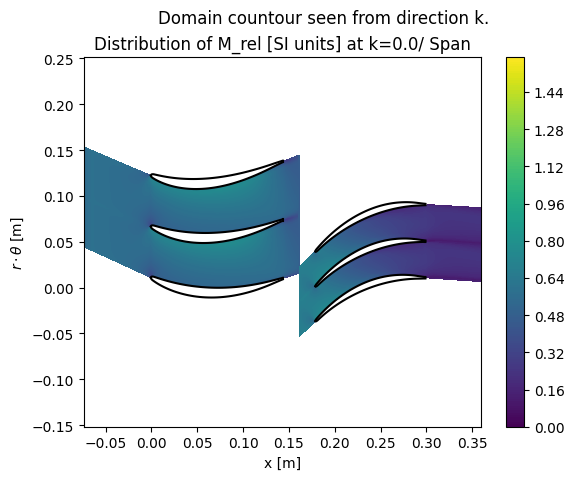

In [144]:
machine.plot.variable_B2B(variable,0.0,list(np.arange(minValue,maxValue,step)))

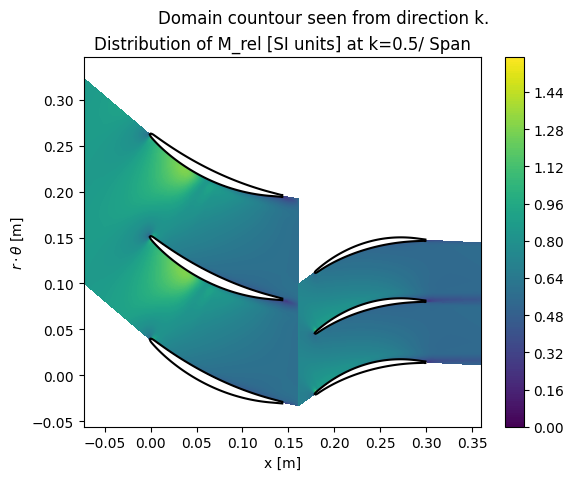

In [145]:
machine.plot.variable_B2B(variable,0.5,list(np.arange(minValue,maxValue,step)))

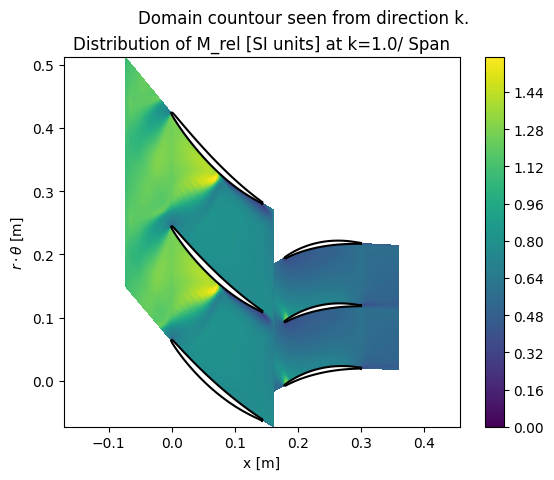

In [146]:
machine.plot.variable_B2B(variable,1.0,list(np.arange(minValue,maxValue,step)))

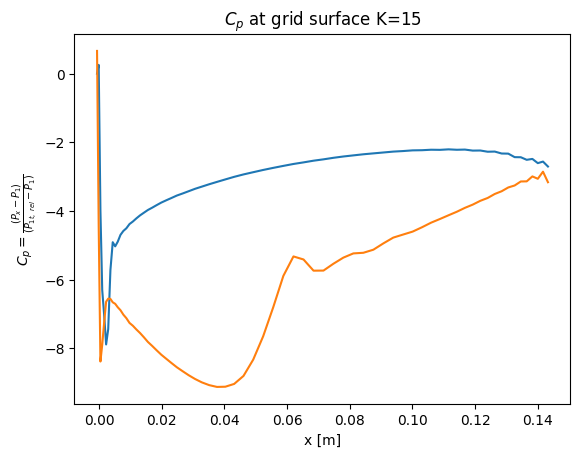

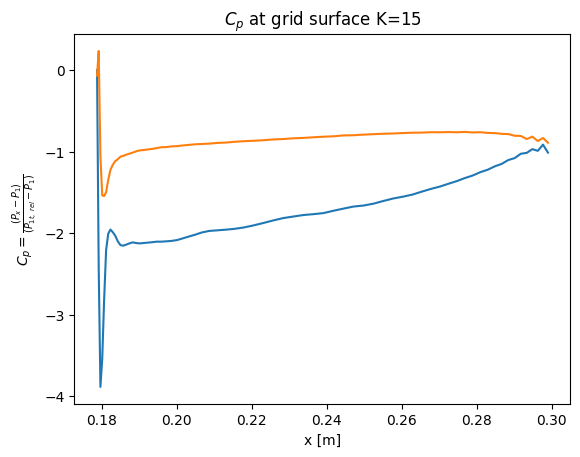

In [155]:
machine.rows[0].blade_original.plot_Cp(0.5)
machine.rows[1].blade_original.plot_Cp(0.5)


# machine.rows[0].passage_original.plot_Cp(0.5)
# machine.rows[1].passage_original.plot_Cp(0.5)


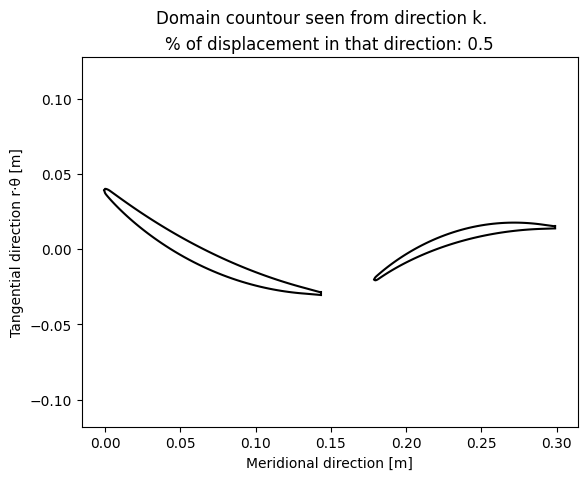

In [148]:
machine.plot.blades_contour( "k", 0.5)

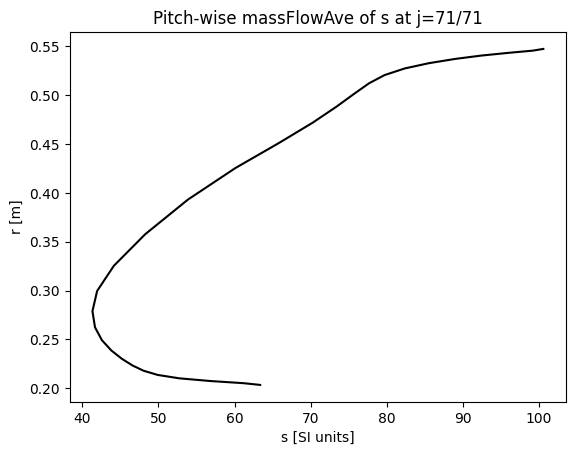

In [149]:
machine.rows[0].blade_original.plot_pitch_average("s",1.0)

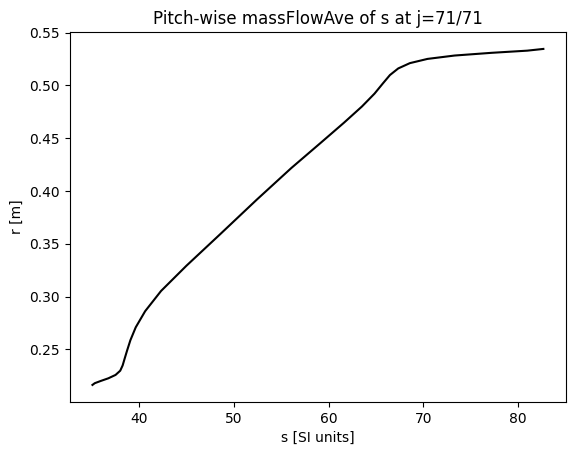

In [150]:
machine.rows[1].blade_original.plot_pitch_average("s",1.0)

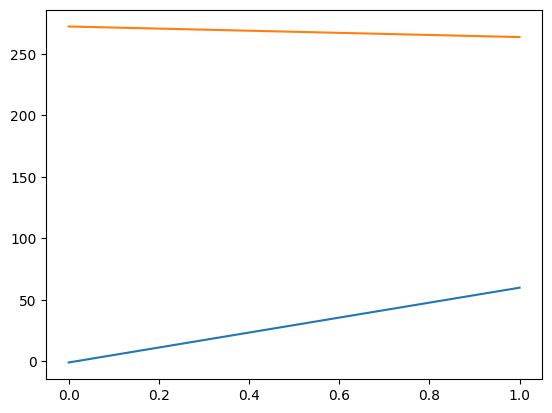

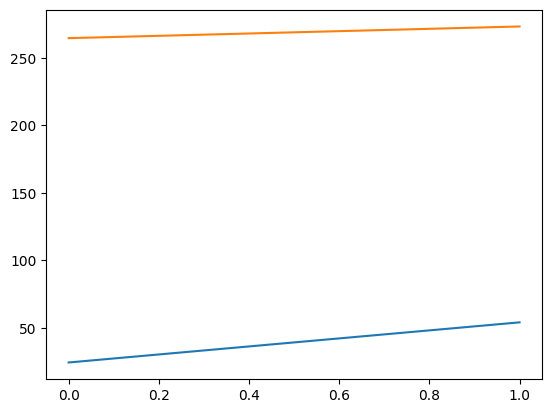

In [151]:
xs = [0,1]

sRotor = []
Trotor = []

sStator = []
TStator = []

vRotor = 0
vStator = 0


for x in xs:
    sRotor.append(machine.rows[0].blade_original.get_mass_flow_average("s", x, [0,1], [0,1]))
    Trotor.append(machine.rows[0].blade_original.get_mass_flow_average("T", x, [0,1], [0,1]))
    vRotor = machine.rows[0].blade_original.get_mass_flow_average("V_rel", x, [0,1], [0,1])
    
    
    
    sStator.append(machine.rows[1].blade_original.get_mass_flow_average("s", x, [0,1], [0,1]))
    TStator.append(machine.rows[1].blade_original.get_mass_flow_average("T", x, [0,1], [0,1]))
    vStator = machine.rows[1].blade_original.get_mass_flow_average("V_stn", x, [0,1], [0,1])
        
plt.plot(xs,sRotor)
plt.plot(xs,Trotor)

plt.show()


plt.plot(xs,sStator)
plt.plot(xs,TStator)

In [152]:
        
def getZeta(T,s,vref):
    # TdeltaS = np.trapezoid(T,s)
    TdeltaS = np.trapezoid(T,s)
    print(TdeltaS)
    print(vref)
    zeta = TdeltaS*2/(vref)**2
    return float(zeta)

zetaRotor  = getZeta(Trotor,sRotor,vRotor)
zetaStator = getZeta(TStator,sStator,vStator)


print(zetaRotor,zetaStator)

16323.179018968032
128.1720646568867
7991.295503366236
117.70434613572642
1.9872292865386183 1.1536184358075823
